# Predict if the client will subscribe a term deposit 

#### Goal: 
Task is to create a model that will help this banking institution determine, in advance, clients who will be receptive to marketing campaigns.

#### Benefit of marketing campaign:
1. Direct marketing campaigns can be linked to increasing business revenue by informing potential customers about new bank products, and promoting them for sale. 

2. Targeted marketing campaigns can significantly increase subscription/purchase rates fpr new bank products and revenue as the targeted audience is based on the criteria determined from analysis of past marketing campaigns. 

Thus, data mining on past campaigns and profiling target customers/potential buyers can  reduce marketing costs & increase revenue.


#### Data: 
1. The case study is based on an example from UC Irvine’s Machine Learning Repository. 
(https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ) 

2. Datasets contain direct marketing campaign outcomes of a Portuguese banking institution based on phone calls that were performed between May 2008 and November 2010. 


#### About Dataset:
1. The marketing campaign is to sell term deposits. For each phone call, client information  and the outcome of the phone call is noted. 
2. Client information contains age, education status and the client's current financial situation. 
3. Last phone call information from the previous marketing campaign is also noted. 

This provides information on type of client that has been contacted, along with information on the historical outcome from previous marketing campaigns.


##### For this case study, bank-additional-full.csv file is used. It contains more features than bank-full.csv.

## -----------------------------------------------------------------------------------

## --------------------Section 1: Familiarize with dataset--------------------

1. Import required Python libraries
2. Import dataset
3. Check missing values
4. Check types of columns
5. Check column datatypes



In [1]:
import pandas as pd

from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
import pickle

from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from collections import Counter
import sklearn; print("Scikit-Learn", sklearn.__version__)

from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, LabelEncoder


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve




import warnings
warnings.filterwarnings("ignore")

Scikit-Learn 0.24.1



##### The list of features from the dataset along with their sample values:

In [2]:
bank_df=pd.read_csv("bank-additional-full.csv", sep=';')

bank_df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


##### Check dataset dimension & evaluate any missing values

In [3]:
bank_df.shape

(41188, 21)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

 There are no missing values. If there were any, missing values can be filled in with median or mode values.

##### Datatypes check to confirm if default datatype matches expected datatypes

In [5]:
# data types
field=[]
types=[]
expectd=['numeric','categorical','categorical','categorical','categorical'
         ,'categorical','categorical','categorical','categorical','categorical'
         ,'numeric','numeric','numeric','numeric','categorical'
         ,'numeric','numeric','numeric','numeric','numeric'
         ,'binary']
value=['numbers','12 categories','4 categories','8 categories','No/Yes/Unknown'
      ,'No/Yes/Unknown','No/Yes/Unknown','Cellular/Telephone','12 categories','5 categories'
      ,'numbers','numbers','numbers','numbers','3 categories'
      ,'numbers','numbers','numbers','numbers','numbers','1/0']
for i in bank_df.columns:
    field.append(i)
    types.append(type(bank_df[i][0]))

data_type=pd.DataFrame(list(zip(field,types,expectd, value)))
data_type.rename(columns={0:'Field',1:'Default Data Type',2:'Expected Data Type',3:'Expected Field Values'},inplace=True)
data_type

,Field,Default Data Type,Expected Data Type,Expected Field Values
0,age,<class 'numpy.int64'>,numeric,numbers
1,job,<class 'str'>,categorical,12 categories
2,marital,<class 'str'>,categorical,4 categories
3,education,<class 'str'>,categorical,8 categories
4,default,<class 'str'>,categorical,No/Yes/Unknown
5,housing,<class 'str'>,categorical,No/Yes/Unknown
6,loan,<class 'str'>,categorical,No/Yes/Unknown
7,contact,<class 'str'>,categorical,Cellular/Telephone
8,month,<class 'str'>,categorical,12 categories
9,day_of_week,<class 'str'>,categorical,5 categories


## --------------------Section 1 Takeaway: About Dataset ------------------

1. Data has 21 attributes & 41188 instances 
2. No columns have missing values
3. Default datatypes set upon csv import match the expected values per available dataset information. For some fields, datatypes would be changed or encoding would be applied.
4. There are two types of attributes Numerical & Categorical

## -----------------------------------------------------------------------------------

## --------------------Section 2: Study Numerical Attributes-------------------

1. Find central tendency & spread of numeric variables
2. Study distribution plots
3. Identify any outliers

In [6]:
# print statistics for numerical columns
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


##### Check distributions of numeric fields

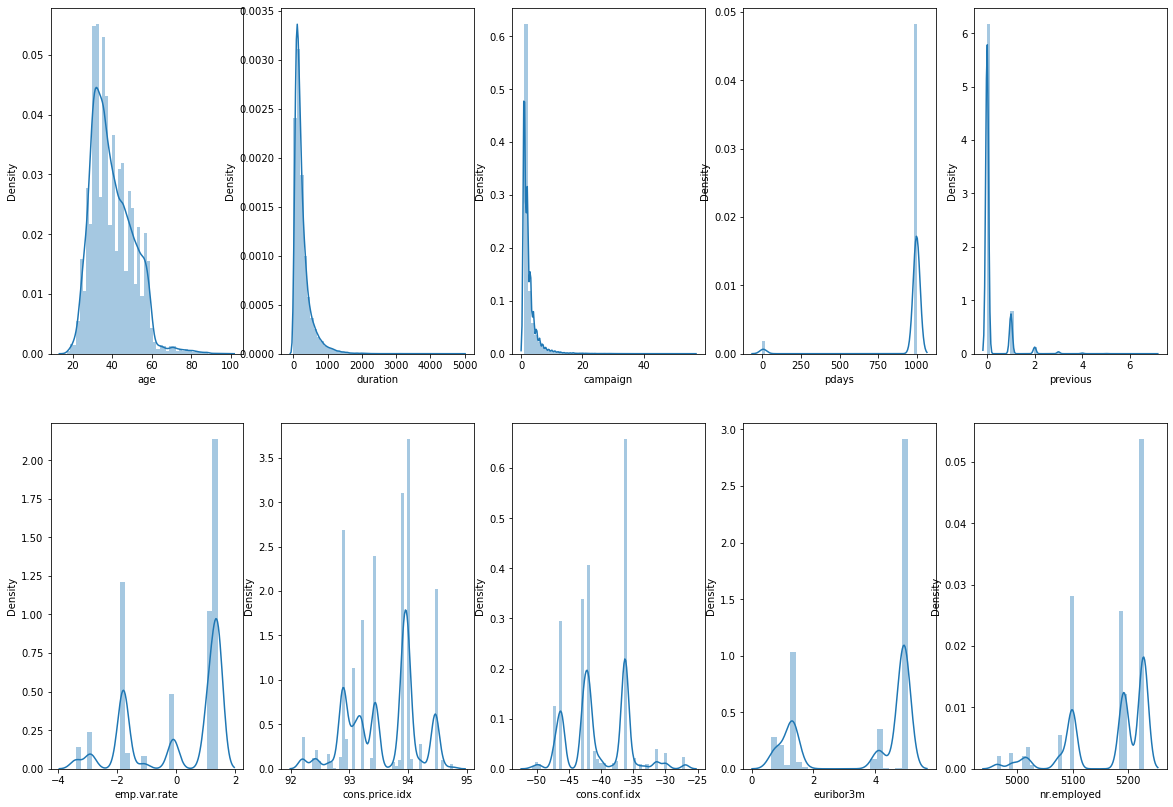

In [7]:
numericFields=[i for i in bank_df.columns if np.issubdtype(bank_df[i].dtype, np.number)]

plt.figure(figsize=(20,14))
for x, column in enumerate(numericFields):
    plt.subplot(2,5, x+1)
    sns.distplot(bank_df[column])
plt.savefig("Numeric_Fields_Distributions.png", format="png",dpi=400)

## ------------------Section 2 Takeaway: Numerical Attributes ----------------

1. All Numeric fields except 'age', 'campaign' and 'duration' have scattered/fewer values.
2. 'pdays'have most values as '999'

## -----------------------------------------------------------------------------------

## -------------------Section 3: Study Categorical Attributes-------------------


1. Study frequency plots
2. Identify any outliers

### Check Frequencies of Categorical fields

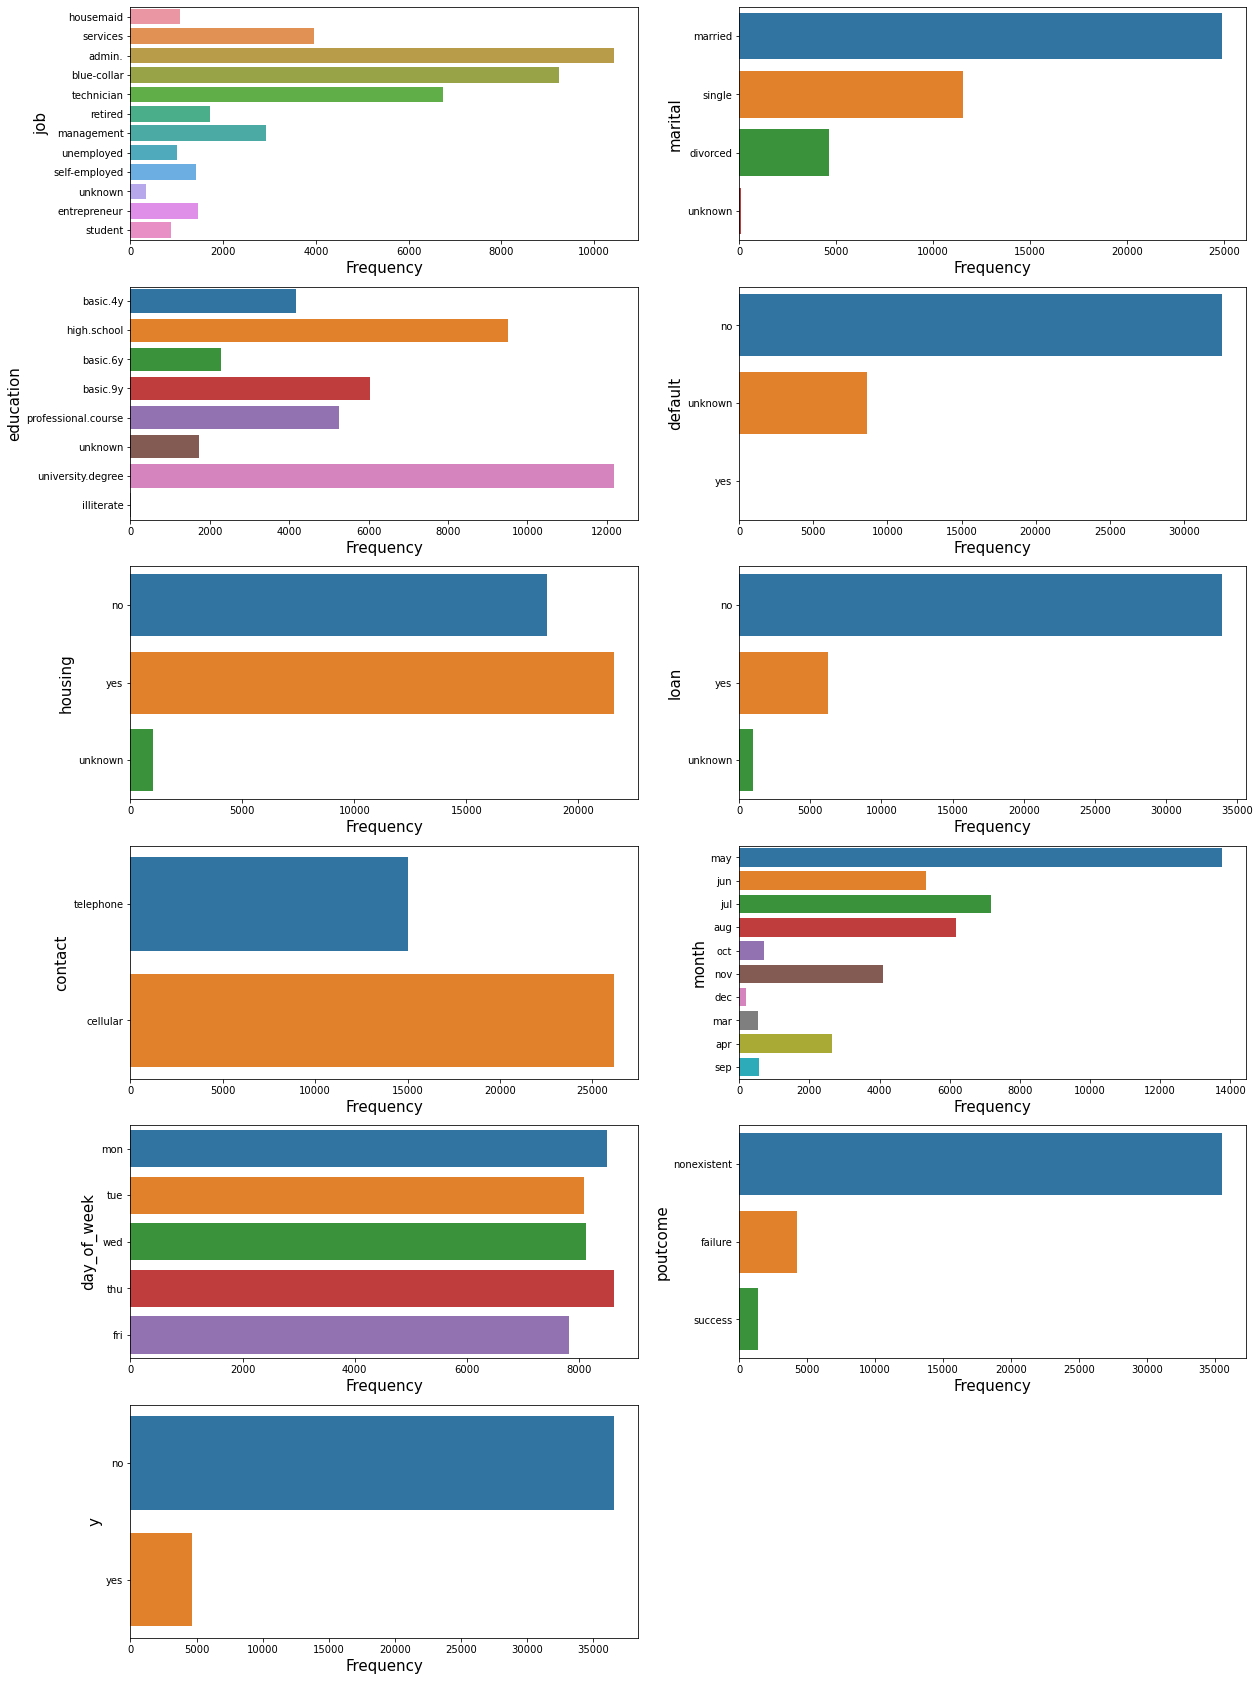

In [8]:
categoricalFields=[i for i in bank_df.columns if pd.api.types.is_string_dtype(bank_df[i])]

plt.figure(figsize=(20,30))
for x, column in enumerate(categoricalFields):
    plt.subplot(6,2, x+1)
    ax=sns.countplot(y=column, data =bank_df)
    ax.set_xlabel("Frequency", fontsize=15)
    ax.set_ylabel(column, fontsize=15)
plt.savefig("Categorical_Fields_Distributions.png", format="png",dpi=400)

## ----------Section 3 Takeaway: Study Categorical Attributes----------------


'unknown' values are present in following fields:
1. Previous campaign outcome
2. loan status
3. default status 
4. housing loan status
5. education, job
6. marital status 

## -----------------------------------------------------------------------------------

## -------------------Section 4: Study Outcome Attribute-------------------


1. Checking proportion of "y: customer subscribed or not" variable
2. Hypothesis test to answer 'Is there a different pattern across numerical variables for contacted customers who subscribed for term deposit and those who did not?'
3. Study relationship between attributes and outcome variable
4. Clean variable values where required

### Checking proportion of "y: customer subscribed or not" variable

In [9]:
print("--------------------------------------------------------")
print("y (customer subscribed or not) field: Frequency")
print(bank_df['y'].value_counts())
print("--------------------------------------------------------")
print("y (customer subscribed or not) field: Percentage")
print((bank_df['y'].value_counts(normalize=True)*100))

--------------------------------------------------------
y (customer subscribed or not) field: Frequency
no     36548
yes     4640
Name: y, dtype: int64
--------------------------------------------------------
y (customer subscribed or not) field: Percentage
no     88.734583
yes    11.265417
Name: y, dtype: float64


There are 11.3% 'yes' and 88.7% 'no' values in 'y' field. 
#### This indicates that only 11% of contacted customers accepted bank offer of term deposit.

### Is there a different pattern across numerical variables for contacted customers who subscribed for term deposit and those who did not?


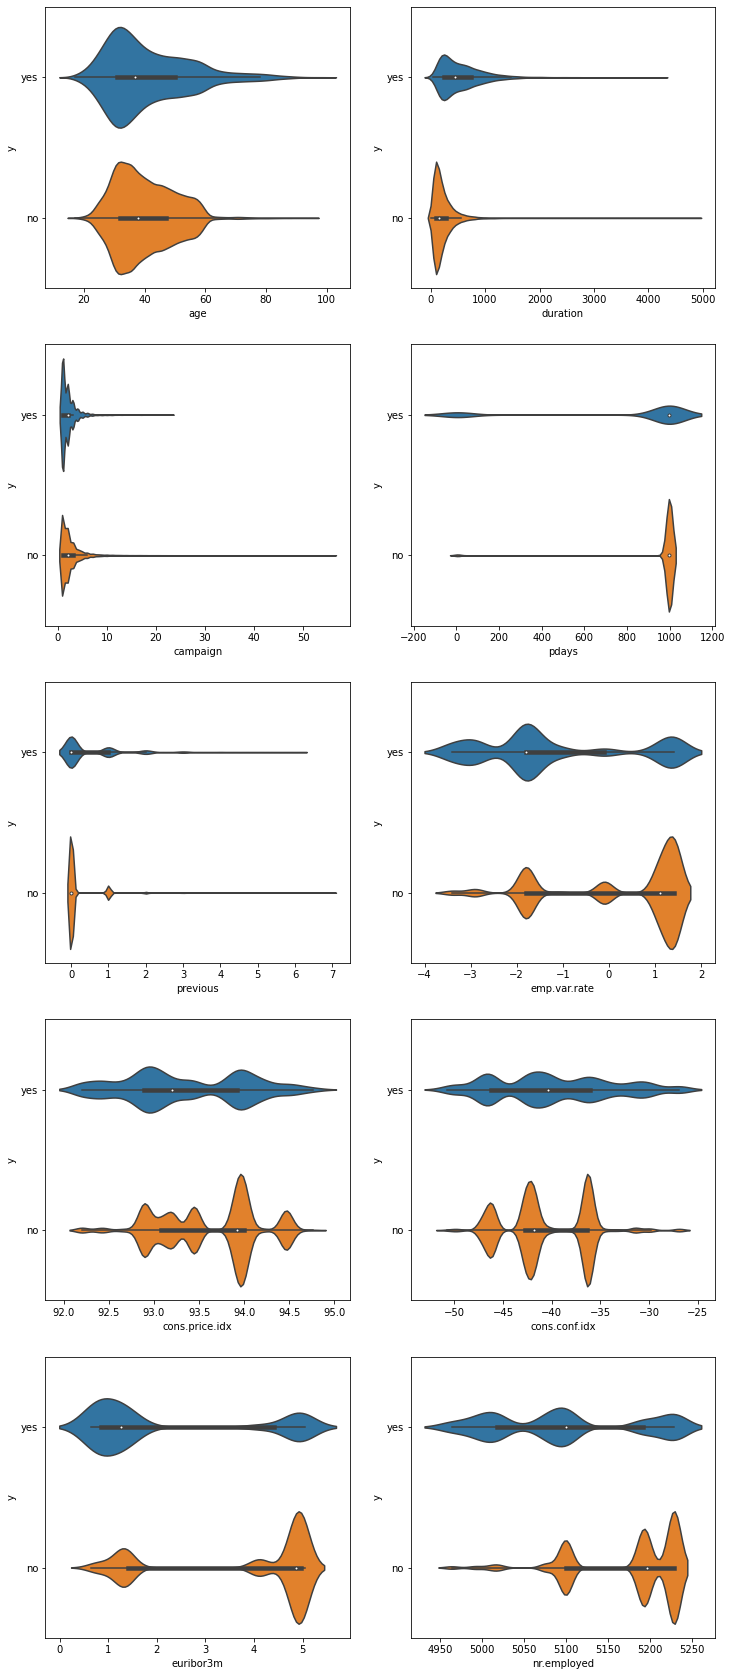

In [10]:
plt.figure(figsize=(12,30))
for index, column in enumerate(numericFields):
    plt.subplot(5, 2, index+1)
    sns.violinplot(x=column, y="y", data=bank_df, order=["yes", "no"])
plt.savefig("violin_plots_numerical_fields.png", format="png", dpi=500)

In [11]:
# Compute mean of columns for subscribers and non-subscribers and then evaluate 
# t test statistic with pvalue with 
# Null hypothesis as there is no difference in means for subscribers and non-subscribers


def Hypothesis_test(df, col):
    
    subscriber_rows = df["y"] == "yes"
    yes_values = df[col][subscriber_rows]
    no_values = df[col][~subscriber_rows]
    mean_subscribers = yes_values.mean()
    mean_nonsubscribers = no_values.mean()
    ttest_res = ttest_ind(yes_values, no_values)
    kstest_res=ks_2samp(yes_values, no_values)
    
    return [col, mean_subscribers, mean_nonsubscribers,
            round(ttest_res[0], 4), round(ttest_res[1],0),
            round(kstest_res[0], 4), round(kstest_res[1],0)
           ]

Hypothesis_test_df = pd.DataFrame(columns=["Numeric Field", "mean_subscribers", "mean_nonsubscribers", "t_test statistic", "t_test pvalue"
                                      , "ks_test statistic", "ks_test pvalue"
                                     ])
for index, column in enumerate(numericFields):
    Hypothesis_test_df.loc[index] = Hypothesis_test(bank_df, column)
    
Hypothesis_test_df



,Numeric Field,mean_subscribers,mean_nonsubscribers,t_test statistic,t_test pvalue,ks_test statistic,ks_test pvalue
0,age,40.913147,39.911185,6.1721,0.0,0.0861,0.0
1,duration,553.191164,220.844807,89.9672,0.0,0.4641,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0,0.0808,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0,0.1934,0.0
4,previous,0.492672,0.132374,48.0027,0.0,0.2102,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0,0.4324,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0,0.2281,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0,0.1998,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0,0.4326,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0,0.4324,0.0


### Conclusion from Hypothesis test:

1. The p value for t test is < 0.05 indicating that there is not enough evidence to support null hypothesis that there is no difference between mean values for subscribers and non-subscribers.

2. The p value for kolmogorov-smirnov test is < 0.05 indicating that there is not enough evidence to support null hypothesis that there is no difference between distributions for subscribers and non-subscribers.


#### This leads us to conclude that there is a significant difference in mean values & distributions of numerical variables for subscribers & non-subscribers.



In [12]:

print('\n\ncheck proportion of job vs y: ') 
print(bank_df.groupby(['job','y']).size())

print('\n\ncheck proportion of education vs y: ')
print(bank_df.groupby(['education','y']).size())

print('\n\ncheck proportion of  month vs y: ') 
print(bank_df.groupby(['month','y']).size())






check proportion of job vs y: 
job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64


check proportion of education vs y: 
education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school        

In [13]:
print('\n\ncheck proportion of  default vs y: ' )
print(bank_df.groupby(['y', 'default']).size())
print('\n\ncheck proportion of loans vs y:') 
print(bank_df.groupby(['loan','y']).size())
print('\n\ncheck proportion of marital vs y: ') 
print(bank_df.groupby(['marital','y']).size())
print('\n\ncheck proportion of poutcome vs y: ') 
print(bank_df.groupby(['poutcome','y']).size())



check proportion of  default vs y: 
y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64


check proportion of loans vs y:
loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64


check proportion of marital vs y: 
marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
dtype: int64


check proportion of poutcome vs y: 
poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      no       479
             yes      894
dtype: int64


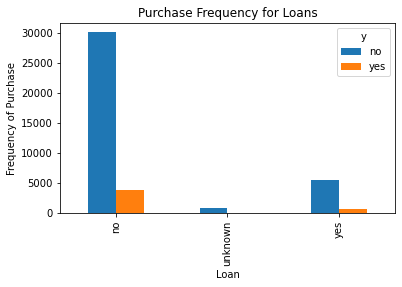

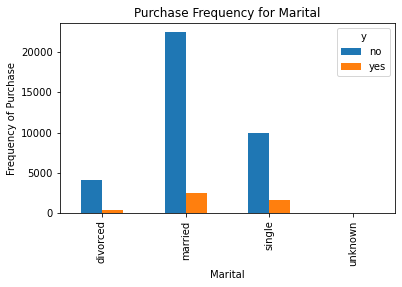

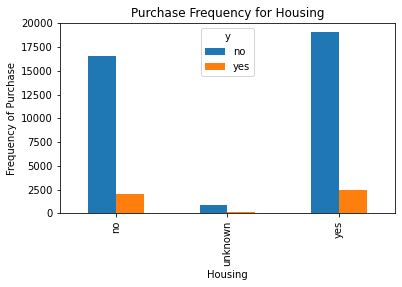

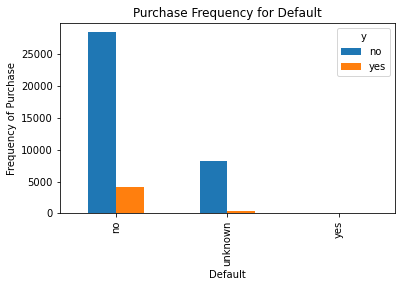

In [14]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (6, 3.5)



pd.crosstab(bank_df.loan, bank_df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Loans')
plt.xlabel('Loan')
plt.ylabel('Frequency of Purchase')
plt.show()

pd.crosstab(bank_df.marital, bank_df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Marital')
plt.xlabel('Marital')
plt.ylabel('Frequency of Purchase')
plt.show()


pd.crosstab(bank_df.housing, bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Housing')
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase')
plt.show()

pd.crosstab(bank_df.default, bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Default')
plt.xlabel('Default')
plt.ylabel('Frequency of Purchase')
plt.show()

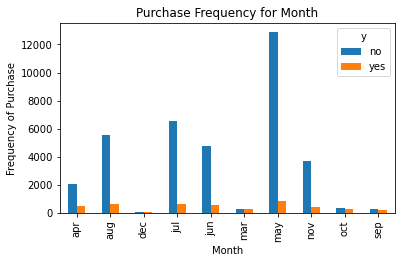

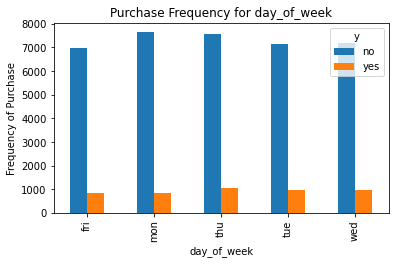

In [15]:

pd.crosstab(bank_df.month, bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()
pd.crosstab(bank_df.day_of_week, bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('Frequency of Purchase')
plt.show()

Subscribers are spread over all months except December
Day of week for contacting Subscriber doesn’t seem to matter much.

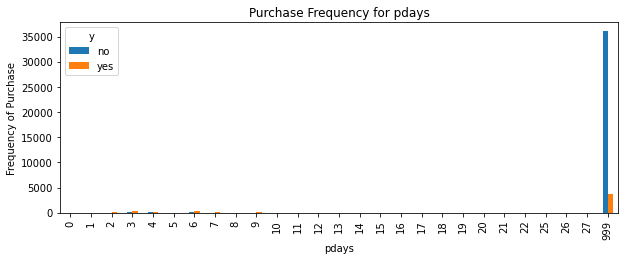

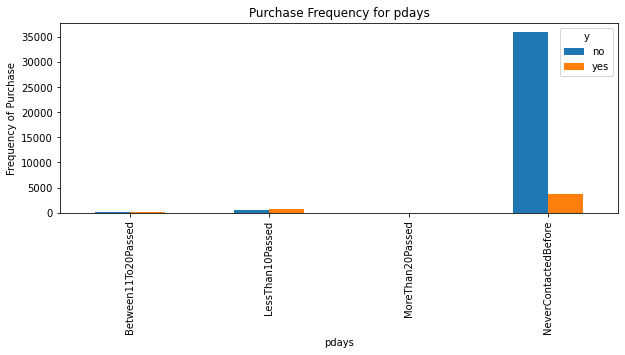

In [16]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10,3.5)


pd.crosstab(bank_df.pdays, bank_df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency of Purchase')
plt.show()


# create a list of our conditions
conditions = [
    (bank_df['pdays'] <= 10),
    (bank_df['pdays'] > 10) & (bank_df['pdays'] <= 20),
    (bank_df['pdays'] > 20) & (bank_df['pdays'] != 999),
    (bank_df['pdays'] == 999)
    ]

# create a list of the values we want to assign for each condition
values = ['LessThan10Passed', 'Between11To20Passed', 'MoreThan20Passed', 'NeverContactedBefore']

# create a new column and use np.select to assign values to it using our lists as arguments
bank_df['pdays'] = np.select(conditions, values)

pd.crosstab(bank_df.pdays, bank_df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency of Purchase')
plt.show()



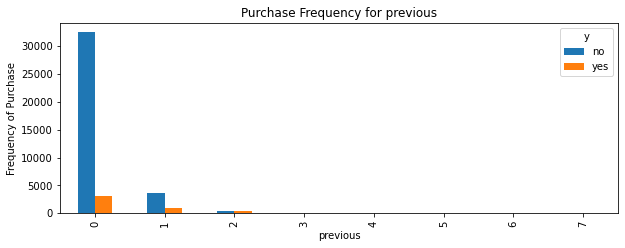

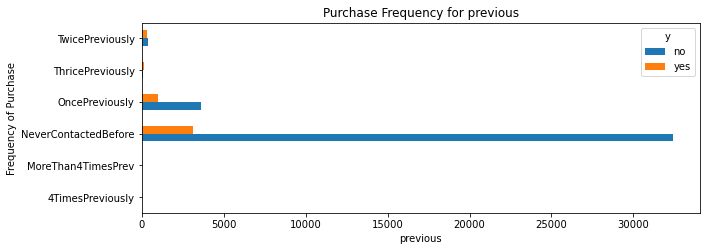

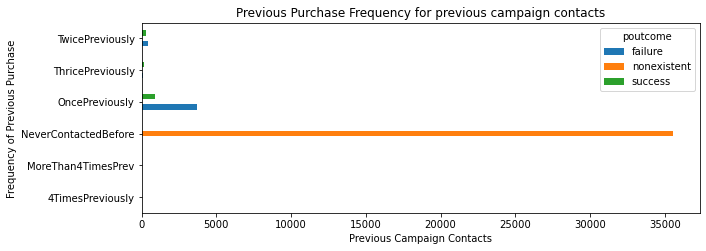

In [17]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10,3.5)


pd.crosstab(bank_df.previous, bank_df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for previous')
plt.xlabel('previous')
plt.ylabel('Frequency of Purchase')
plt.show()


# create a list of our conditions
conditions = [
    (bank_df['previous'] == 0),
    (bank_df['previous'] ==1) ,
    (bank_df['previous'] ==2),
    (bank_df['previous'] ==3),
    (bank_df['previous'] ==4),
    (bank_df['previous'] >4)
    ]

# create a list of the values we want to assign for each condition
values = ['NeverContactedBefore','OncePreviously'
          ,'TwicePreviously','ThricePreviously'
          ,'4TimesPreviously','MoreThan4TimesPrev'
          ]

# create a new column and use np.select to assign values to it using our lists as arguments
bank_df['previous'] = np.select(conditions, values)

pd.crosstab(bank_df.previous, bank_df.y).plot(kind= 'barh')
plt.title('Purchase Frequency for previous')
plt.xlabel('previous')
plt.ylabel('Frequency of Purchase')
plt.show()



pd.crosstab(bank_df.previous, bank_df.poutcome).plot(kind= 'barh')
plt.title('Previous Purchase Frequency for previous campaign contacts')
plt.xlabel('Previous Campaign Contacts')
plt.ylabel('Frequency of Previous Purchase')
plt.show()

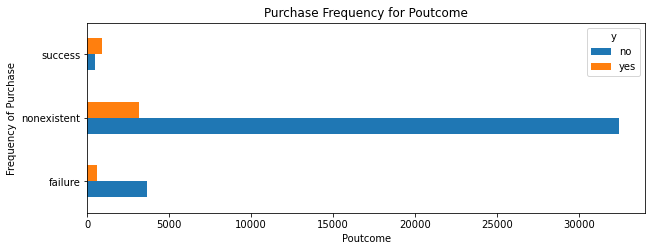

In [18]:
pd.crosstab(bank_df.poutcome, bank_df.y).plot(kind= 'barh')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

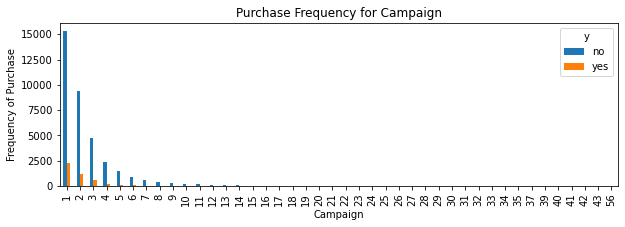

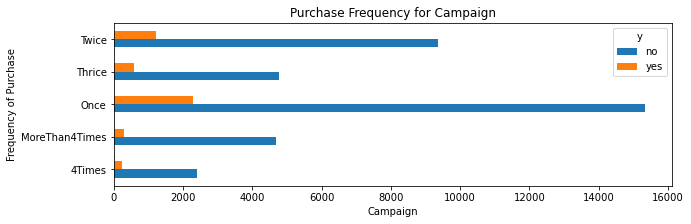

In [19]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 3)
pd.crosstab(bank_df.campaign, bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency of Purchase')
plt.show()


# create a list of our conditions
conditions = [
    (bank_df['campaign'] == 0),
    (bank_df['campaign'] ==1) ,
    (bank_df['campaign'] ==2),
    (bank_df['campaign'] ==3),
    (bank_df['campaign'] ==4),
    (bank_df['campaign'] >4)
    ]

# create a list of the values we want to assign for each condition
values = ['NeverContact','Once'
          ,'Twice','Thrice'
          ,'4Times','MoreThan4Times']



# create a new column and use np.select to assign values to it using our lists as arguments
bank_df['campaign'] = np.select(conditions, values)

pd.crosstab(bank_df.campaign, bank_df.y).plot(kind='barh')
plt.title('Purchase Frequency for Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency of Purchase')
plt.show()

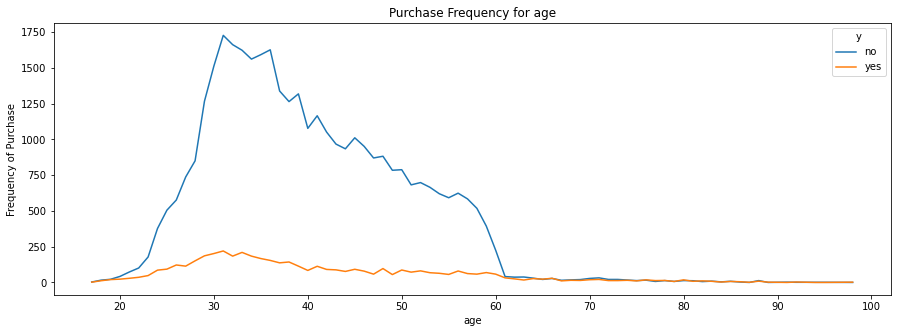

In [20]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 5)
pd.crosstab(bank_df.age, bank_df.y).plot(kind='line')
plt.title('Purchase Frequency for age')
plt.xlabel('age')
plt.ylabel('Frequency of Purchase')
plt.show()




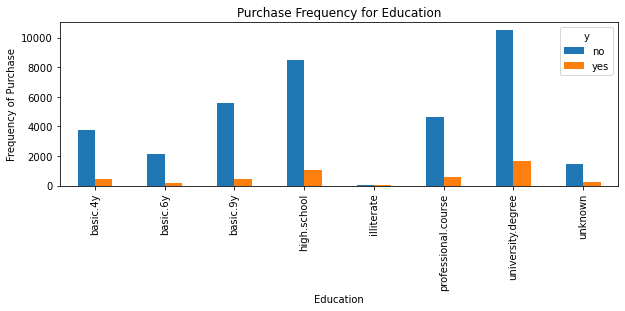

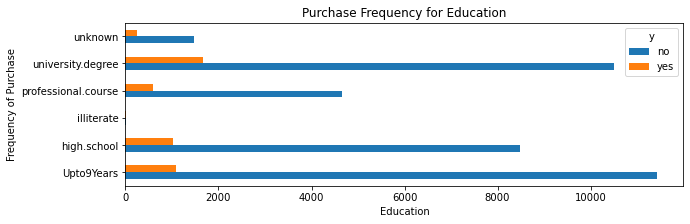

In [21]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 3)
pd.crosstab(bank_df.education, bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
plt.show()

bank_df['education']=np.where(bank_df['education'] =='basic.9y', 'Upto9Years', bank_df['education'])
bank_df['education']=np.where(bank_df['education'] =='basic.6y', 'Upto9Years', bank_df['education'])
bank_df['education']=np.where(bank_df['education'] =='basic.4y', 'Upto9Years', bank_df['education'])

pd.crosstab(bank_df.education, bank_df.y).plot(kind='barh')
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
plt.show()

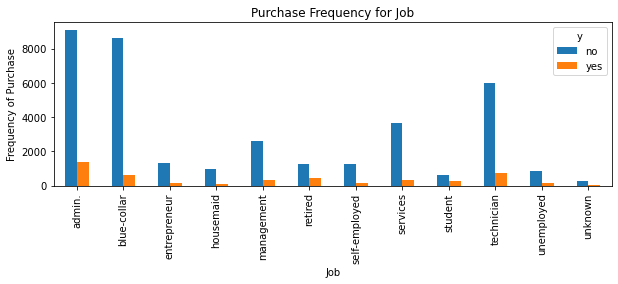

In [22]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 3)
pd.crosstab(bank_df.job, bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

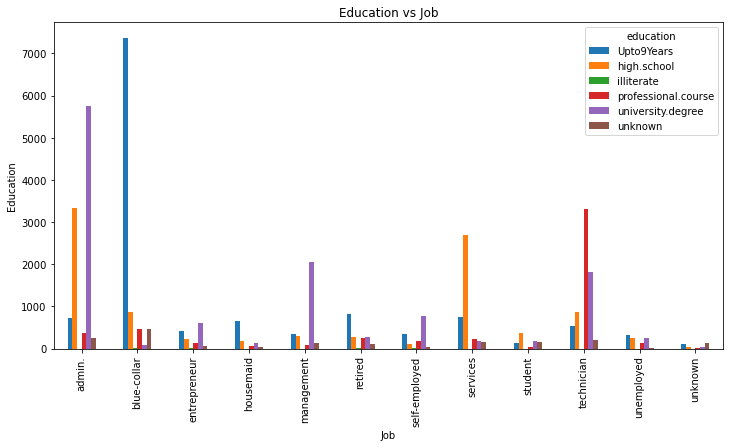

In [23]:
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 6)
pd.crosstab(bank_df.job, bank_df.education).plot(kind='bar')
plt.title('Education vs Job')
plt.xlabel('Job')
plt.ylabel('Education')
plt.show()

## -------------------Section 4 Takeaway: Study Outcome Attribute-----------


1. Subscribers are spread between 25 and 60 years of age 
2. Most Subscribers are between 30-40 years age
3. Majority of the Subscribers have university degree
4. Top work profile for subscribers is Administration 
5. Subscribers are spread over all months except December
6. Day of week for contacting Subscriber doesn’t seem to matter much
7. Majority of the Subscribers for current campaign were not contacted previously 


## -----------------------------------------------------------------------------------

## -------------------Section 5: Feature Engineering----------------------------

1. Encode categorical variables
2. Standardize numerical variables
3. Perform Correlation Analysis to eliminate correlated features
4. Train & Test Set Split
5. Perform Recurrsive Feature Elimination Analysis to determine optimal features


In [24]:
marketing_fields = ["age", "duration", "campaign", "previous"]
indicator_fields = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]


<Figure size 864x1440 with 0 Axes>

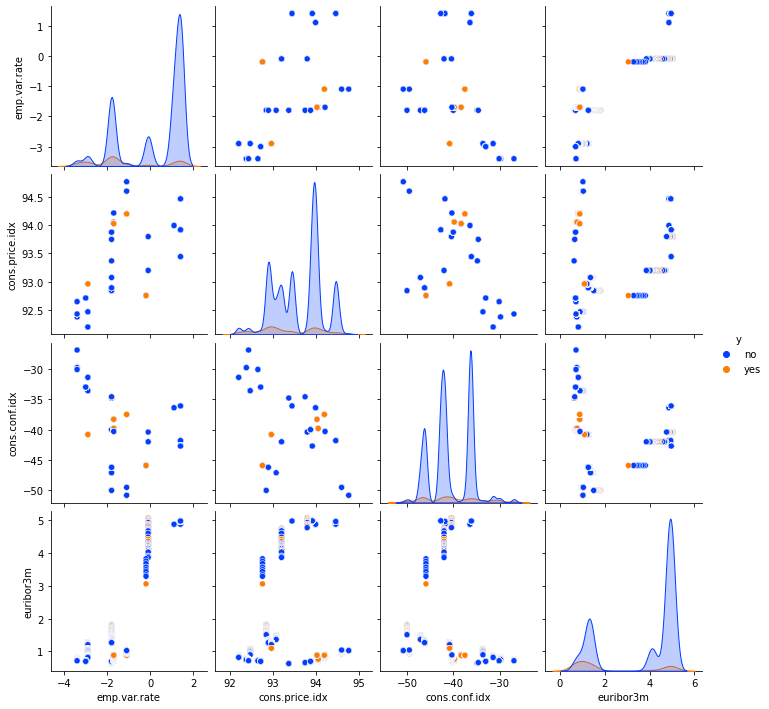

In [25]:
indicator_plot_data = bank_df[indicator_fields + ["y"]]
plt.figure(figsize=(12,20))
#sns.color_palette("Paired")
sns.pairplot(indicator_plot_data, hue="y", palette="bright")
plt.savefig("pairplot_indicator_fields.png", format="png", dpi=250)

In [26]:
# CREATE LIST OF FEATURES
numeric_fields = ["age"
                  , "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m","nr.employed"]
categoricalFields=[ 'job', 'education'
                   , 'marital', 'default', 'housing', 'loan'
                   , 'contact', 'month', 'day_of_week'
                   , 'poutcome','previous','pdays'
                   , 'campaign']
print(categoricalFields)
print(numeric_fields)

['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'previous', 'pdays', 'campaign']
['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### ENCODING FOR CATEGORICAL VARIABLES

1. One-hot encoding is used to create new columns for each unique value in that column
2. Dummy encoding is to ensure the number of dummy-coded variables needed is one less than the number of possible values
* Dummy encoding variable is a standard recommendation to avoid the dummy variable trap. However, One-Hot encoding is more recommended in practical world because dummy variable trap is not really a problem when applying regularization.
4. 'drop_first = True' option is used to address correlation issue between these newly created columns (value in one column can be figured out from rest of the columns)


In [27]:
bank_df[categoricalFields]
encoded= pd.get_dummies(bank_df[categoricalFields], drop_first=True)
bank_df = pd.concat([bank_df,encoded],axis=1 )

data_vars=bank_df.columns.values.tolist()

to_keep=[i for i in data_vars if i not in categoricalFields]

df=bank_df[to_keep]
df.columns.values


array(['age', 'duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success', 'previous_MoreThan4TimesPrev',
       'previous_NeverCon

In [28]:

df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})
df['y'].unique()

array([0, 1])

Drop Duration Variable as it cannot be used for prediction model.

In [29]:
df=df.drop(['duration'], axis=1)
df.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,...,previous_OncePreviously,previous_ThricePreviously,previous_TwicePreviously,pdays_LessThan10Passed,pdays_MoreThan20Passed,pdays_NeverContactedBefore,campaign_MoreThan4Times,campaign_Once,campaign_Thrice,campaign_Twice
0,56,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,57,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,37,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,40,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,56,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [30]:
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1))
                        , columns = df.drop(['y'], axis = 1).columns)


In [31]:
features.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,previous_OncePreviously,previous_ThricePreviously,previous_TwicePreviously,pdays_LessThan10Passed,pdays_MoreThan20Passed,pdays_NeverContactedBefore,campaign_MoreThan4Times,campaign_Once,campaign_Thrice,campaign_Twice
0,0.481481,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.493827,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.246914,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.283951,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.481481,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [32]:
correlated_features = set()
correlation_matrix = features.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features


{'euribor3m',
 'loan_unknown',
 'nr.employed',
 'pdays_LessThan10Passed',
 'pdays_NeverContactedBefore',
 'previous_NeverContactedBefore',
 'previous_OncePreviously'}

In [33]:
sub_fields=['pdays_LessThan10Passed','pdays_NeverContactedBefore','previous_NeverContactedBefore','previous_OncePreviously']
plot_data = features[sub_fields]
corr = plot_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,pdays_LessThan10Passed,pdays_NeverContactedBefore,previous_NeverContactedBefore,previous_OncePreviously
pdays_LessThan10Passed,1.00,-0.93,-0.46,0.26
pdays_NeverContactedBefore,-0.93,1.00,0.49,-0.29
previous_NeverContactedBefore,-0.46,0.49,1.00,-0.89
previous_OncePreviously,0.26,-0.29,-0.89,1.00


In [34]:
sub_fields=["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m","nr.employed"]
plot_data = features[sub_fields]
corr = plot_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.00,0.78,0.20,0.97,0.91
cons.price.idx,0.78,1.00,0.06,0.69,0.52
cons.conf.idx,0.20,0.06,1.00,0.28,0.10
euribor3m,0.97,0.69,0.28,1.00,0.95
nr.employed,0.91,0.52,0.10,0.95,1.00


There is high correlation between euribor3m and emp.var.rate. One of the variables would be dropped prior to modeling.

In [35]:
features=features.drop(['euribor3m','loan_unknown','pdays_NeverContactedBefore','nr.employed'], axis=1)


correlated_features = set()
correlation_matrix = features.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features


{'pdays_LessThan10Passed',
 'previous_NeverContactedBefore',
 'previous_OncePreviously'}

In [36]:

Subscribers = df[df['y']==1]

Non_Subscribers = df[df['y']==0]

print(Subscribers.shape,Non_Subscribers.shape)

(4640, 60) (36548, 60)


Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [37]:

y = df.loc[:, df.columns == 'y']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_X))
print("Number of non Subscribers in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Subscribers",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non Subscribers data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proporion of Subscribers data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))



length of oversampled data is  51158
Number of non Subscribers in oversampled data 25579
Number of Subscribers 25579
Proportion of non Subscribers data in oversampled data is  0.5
Proporion of Subscribers data in oversampled data is  0.5


In [38]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)


Recursive Feature Elimination: (Reference Sklearn Documentation)
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

Fitting estimator with 55 features.
Fitting estimator with 54 features.
Optimal number of features: 53


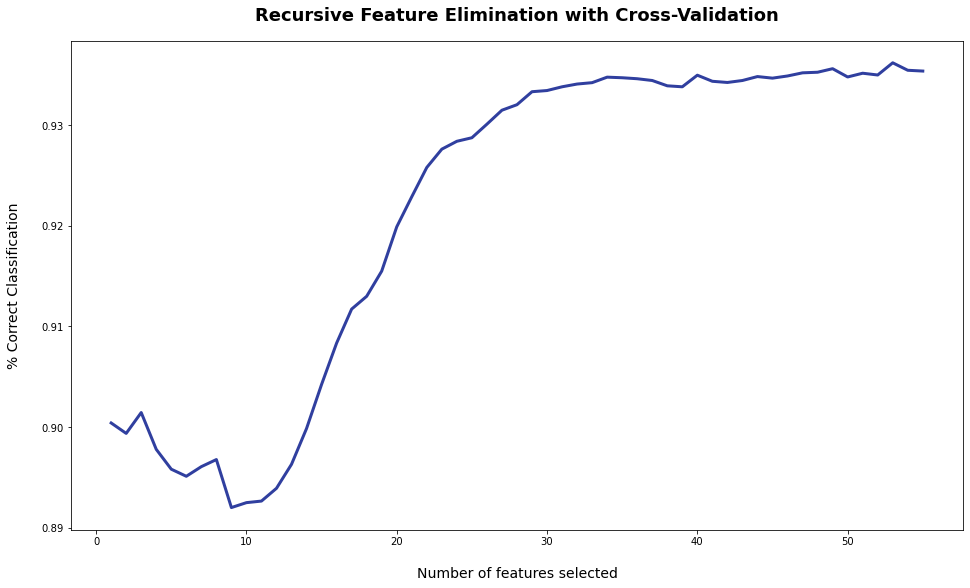

In [39]:
X = os_data_X
target = os_data_y

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=4,verbose=1, scoring='accuracy', n_jobs=-1)
rfecv.fit(X, target)

print('Optimal number of features: {}'.format(rfecv.n_features_))

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [40]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[24 50]


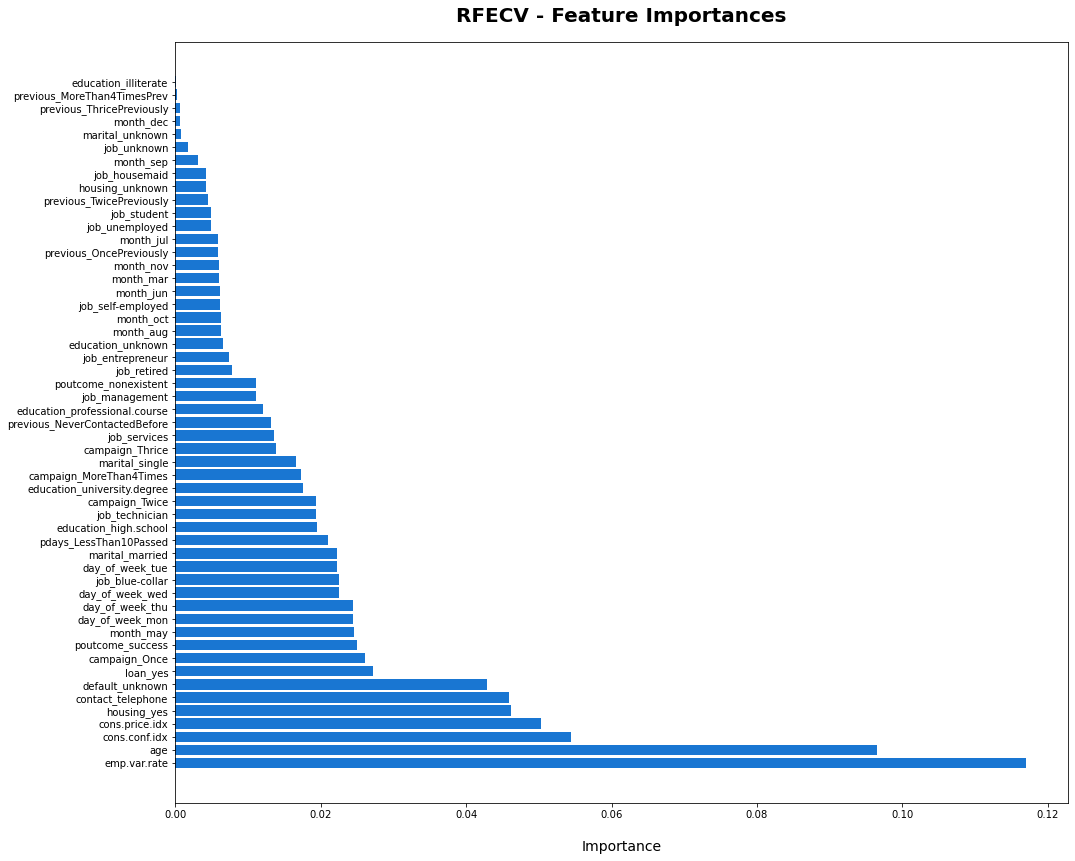

In [41]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


## -----------------Section 5 Takeaway: Feature Engineering---------------


#### Correlation Analysis led to removal of 4 features
euribor3m, loan_unknown, pdays_NeverContactedBefore, nr.employed

#### The data is imbalanced with only 11% Positive outcomes.

Prediction models may provide high accuracy even if it predicts that every client would 
not subscribe.

To address this, either of the approach can work:
a. Oversampling of subscribers class
b. Classification Models with balanced weights

#### Recurrsive Feature Elimination Analysis determined 53 as optimal features
Only these 53 important features are used for splitting the data and then predicting.

#### Some of the Importance Features for modeling are
1. macro economic indicators
2. age
3. loan status as yes
4. campaign (number of contacts)

## -----------------------------------------------------------------------------------

## ---------Section 6 : Classification Models with over-sample---------------



Accuracy of logistic regression classifier on test set: 0.81
Confusion Matrix
[[9112 1857]
 [ 504  884]]
Precision, Recall, F1 Report
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10969
           1       0.32      0.64      0.43      1388

    accuracy                           0.81     12357
   macro avg       0.64      0.73      0.66     12357
weighted avg       0.88      0.81      0.83     12357



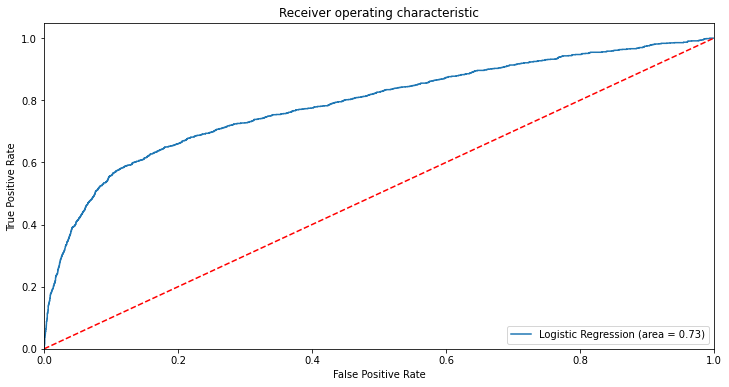

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()


X_test.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

logreg.fit(os_data_X, os_data_y)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(confusion_matrix)

print('Precision, Recall, F1 Report')
print(classification_report(y_test, y_pred))

# Plot ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


plt.savefig('Log_ROC')
plt.show()


In [50]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [25, 50, 75, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }


clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")


clf.fit(os_data_X, os_data_y)
print(clf.best_params_)
print(clf.best_score_)
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))


print('-------------------------------------')
print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

print('-------------------------------------')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

print('-------------------------------------')
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, clf.predict(X_test))
print('-------------------------------------')
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('-------------------------------------')


{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.8987256364692305
-------------------------------------
F1-Score on test data is : 0.310
Area under ROC on test data is : 0.607
Accuracy on test data is : 0.860
-------------------------------------
[[10244   725]
 [ 1000   388]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     10969
           1       0.35      0.28      0.31      1388

    accuracy                           0.86     12357
   macro avg       0.63      0.61      0.62     12357
weighted avg       0.85      0.86      0.85     12357

-------------------------------------
-------------------------------------
Average precision-recall score: 0.18
-------------------------------------


In [56]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [25, 50, 75],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
        }
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(os_data_X, os_data_y)

f1_score(y_test, clf.predict(X_test))


print(clf.best_params_)
print(clf.best_score_)

f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))
print('-------------------------------------')
print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)
print('-------------------------------------')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

print('-------------------------------------')
print('Average precision score: {0:0.2f}'.format(average_precision))
print('-------------------------------------')


{'criterion': 'entropy', 'max_depth': 75, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
0.933267104550084
-------------------------------------
F1-Score on test data is : 0.443
Area under ROC on test data is : 0.670
Accuracy on test data is : 0.891
-------------------------------------
[[10473   496]
 [  852   536]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10969
           1       0.52      0.39      0.44      1388

    accuracy                           0.89     12357
   macro avg       0.72      0.67      0.69     12357
weighted avg       0.88      0.89      0.88     12357

-------------------------------------
Average precision score: 0.18
-------------------------------------


{'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.7260047557308748
-------------------------------------
-------------------------------------
F1-Score on test data is : 0.427
Area under ROC on test data is : 0.733
Accuracy on test data is : 0.808
-------------------------------------
[[9105 1864]
 [ 504  884]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     10969
           1       0.32      0.64      0.43      1388

    accuracy                           0.81     12357
   macro avg       0.63      0.73      0.66     12357
weighted avg       0.88      0.81      0.83     12357

-------------------------------------


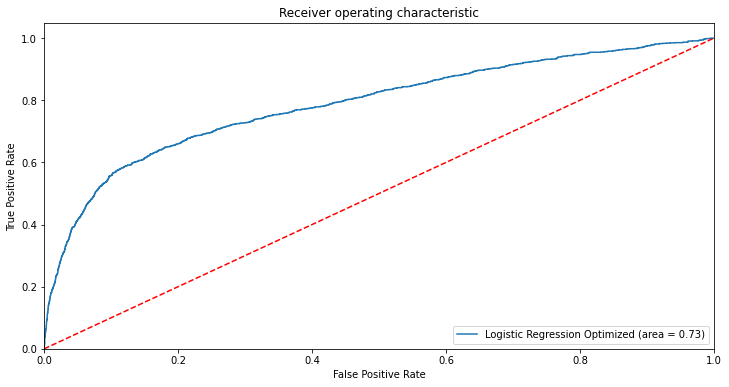

In [55]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(os_data_X, os_data_y)
print(clf.best_params_)
print(clf.best_score_)
print('-------------------------------------')
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print('-------------------------------------')
print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)
print('-------------------------------------')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
print('-------------------------------------')
# Plot ROC Curve

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression Optimized (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


plt.savefig('Log_ROC')
plt.show()



## -----------------------------------------------------------------------------------

## ---------Section 6 Takeaway: Modeling & Results Assessment------------


### Conclusion:
1. Accuracy of all 3 models is over 80% but AUC, F1, Precision & Recall vary
2. Logistic Regression or Random Forest have higher F1 score & AUC 
3. Any of these two (Logistic Regression or Random Forest) model can be chosen based on relevance of Precision/Recall

### Future work:

1. Principal component analysis or Chi Squared Analysis can be performed to determine relevant features
2. Under sampling or other sampling techniques can be leveraged prior to modeling
3. Advanced classification models like XGBoost can be used for prediction
